In [9]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

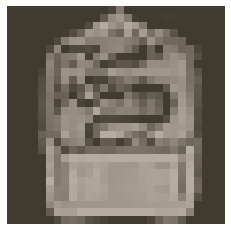

In [10]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [12]:
#Building the network
from torch import nn, optim
import torch.nn.functional as F

In [13]:
#Define network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        #make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [15]:
#train the network
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [19]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"training loss: {running_loss/len(trainloader)}")

training loss: 0.5135564328844486
training loss: 0.3891956151834429
training loss: 0.35565949650779205
training loss: 0.3328005354176325
training loss: 0.3141800079947469


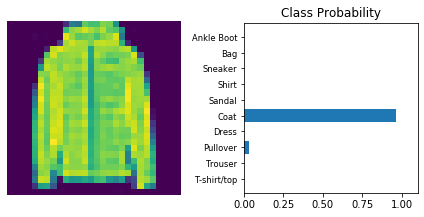

In [20]:
%matplotlib inline
%config InlineBacked.figure_format = 'retina'

import helper

#test out network

dataiter = iter(trainloader)
images, labels = dataiter.next()
img = images[1]

#claculate the class probabilities(softmax) for img
ps = torch.exp(model(img))

#plot the image and probabilities
helper.view_classify(img, ps, version = 'Fashion')